In [2]:
import pandas as pd
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import IPython.display as display
from matplotlib import animation

In [3]:
class expermentDataloader(Dataset):
    def __init__(
        self,
        index_file: str, 
        data_path: str,
    ):
        self.root_dir = data_path
        self.expermentSikeTrainsIndex = pd.read_csv(index_file,header=None) # self.landmarks_frame = pd.read_csv(csv_file)
        self.spikeTrains = [
            f"{os.path.join(self.expermentSikeTrainsIndex.iloc[i, 0])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]
        self.targets = [
            f"{os.path.join(self.expermentSikeTrainsIndex.iloc[i, 1])}" for i in range(len(self.expermentSikeTrainsIndex)) 
        ]

    def __getitem__(self, index):
        inputCSVlines = pd.read_csv(os.path.join(self.root_dir,self.spikeTrains[index])).to_numpy()
        targetCSVLines = pd.read_csv(os.path.join(self.root_dir,self.targets[index])).to_numpy()
        return np.array(list(inputCSVlines)), np.array(list(targetCSVLines))

    def __len__(self):
        return len(self.expermentSikeTrainsIndex)
    
indexFile5mm = "./Prepocessing/data/test/output/index.csv"
PathTo5mmSpikeTrains = "./Prepocessing/data/test/output"

trainingData = expermentDataloader(indexFile5mm,PathTo5mmSpikeTrains)

# print(len(trainingData[0][0][0]))
# print(len(trainingData[0][1][0]))
trainingData[0]

(array([[  1.  ,  14.15],
        [  1.  ,  14.4 ],
        [  1.  ,  18.8 ],
        [  1.  ,  20.55],
        [  1.  ,  22.9 ],
        [  1.  ,  25.6 ],
        [  1.  ,  27.2 ],
        [  1.  ,  31.45],
        [  1.  ,  33.45],
        [  1.  ,  36.05],
        [  1.  ,  36.25],
        [  1.  ,  36.65],
        [  1.  ,  37.05],
        [  1.  ,  37.2 ],
        [  1.  ,  39.15],
        [  1.  ,  41.3 ],
        [  1.  ,  42.8 ],
        [  1.  ,  47.4 ],
        [  1.  ,  57.1 ],
        [  1.  ,  60.1 ],
        [  1.  ,  62.85],
        [  1.  , 118.1 ],
        [  1.  , 128.55],
        [  1.  , 143.4 ],
        [  1.  , 144.25],
        [  1.  , 147.85],
        [  1.  , 148.45],
        [  1.  , 154.05],
        [  1.  , 161.15],
        [  1.  , 164.25],
        [  1.  , 181.6 ],
        [  1.  , 192.65],
        [  1.  , 199.6 ],
        [  1.  , 203.95],
        [  1.  , 204.9 ],
        [  1.  , 205.3 ],
        [  1.  , 205.6 ],
        [  1.  , 205.85],
        [  1

In [4]:
input = trainingData[0][0]
target = trainingData[0][1]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
input[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

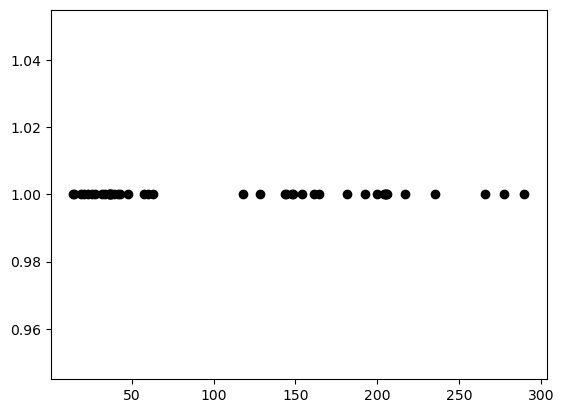

In [7]:
plt.plot(input[:,1], input[:,0], 'o', color='black')

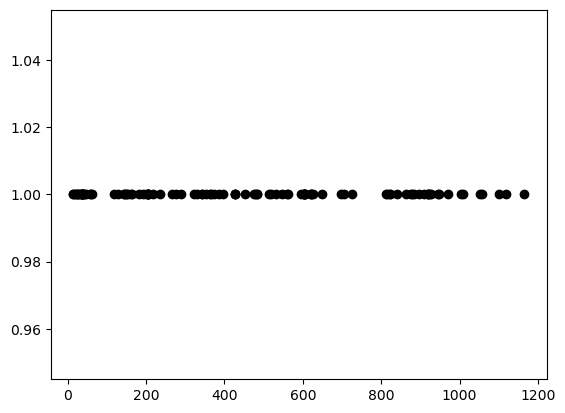

In [8]:
plt.plot(target[:,1], target[:,0], 'o', color='black')

In [11]:
np.sum(target[:,0])

43.0

In [13]:
import torch
from torch import nn

In [16]:
model = nn.Sequential(
          nn.Linear(len(input),1),
          nn.ReLU()
        )
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Linear(in_features=43, out_features=1, bias=True)
  (1): ReLU()
)

In [17]:
MSE = nn.MSELoss()
adam = torch.optim.Adam(model.parameters(),lr=0.00001)

In [18]:
# targetPlot = torch.from_numpy(target[:,0]).float()
targetTorch = torch.tensor(np.sum(target[:,0])).float().to(device)
inputTorch = torch.from_numpy(input[:,1]).float().to(device)

In [21]:
inputTorch

tensor([ 14.1500,  14.4000,  18.8000,  20.5500,  22.9000,  25.6000,  27.2000,
         31.4500,  33.4500,  36.0500,  36.2500,  36.6500,  37.0500,  37.2000,
         39.1500,  41.3000,  42.8000,  47.4000,  57.1000,  60.1000,  62.8500,
        118.1000, 128.5500, 143.4000, 144.2500, 147.8500, 148.4500, 154.0500,
        161.1500, 164.2500, 181.6000, 192.6500, 199.6000, 203.9500, 204.9000,
        205.3000, 205.6000, 205.8500, 216.6500, 235.5500, 265.8500, 277.6000,
        289.8000], device='cuda:1')

In [25]:
for _ in range(100):
    
    output = model(inputTorch)
    loss = MSE(output, targetTorch)
    adam.zero_grad()
    loss.backward()
    adam.step()
    outputPlot = output.clone().detach().cpu().numpy()
    print(loss,end="\r")
    

/home/khood/anaconda3/envs/dna/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [24]:
outputPlot

array([108.00001], dtype=float32)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 10
trainingData = expermentDataloader(indexFile5mm,PathTo5mmSpikeTrains)
dataset = DataLoader(trainingData, batch_size=batch_size, shuffle=True)